In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testtC3.csv')

# Compute composite scores for groups of Likert-scale responses
attitude_questions = ['IMP_1', 'IMP_2', 'EXP_1', 'EXP_2']
norms_questions = ['RES_1', 'RES_2', 'RES_3', 'RES_4']
emotions_questions = ['AFC_1', 'AFC_2']
habits_questions = ['TH_1', 'TH_2', 'TH_3']
knowledge_questions = ['COPK_1', 'COPK_2', 'COPK_3', 'CLK_1', 'CLK_2', 'CLK_3']
information_questions = ['INF_1', 'INF_2', 'INF_3', 'INF_4']

df['attitude_score'] = df[attitude_questions].mean(axis=1)
df['norms_score'] = df[norms_questions].mean(axis=1)
df['emotions_score'] = df[emotions_questions].mean(axis=1)
df['habits_score'] = df[habits_questions].mean(axis=1)
df['knowledge_score'] = df[knowledge_questions].mean(axis=1)
df['information_score'] = df[information_questions].mean(axis=1)

# One-Hot Encoding categorical variables
encoder = OneHotEncoder(drop='first')
categorical_columns = ['AGE', 'GEN', 'DIS', 'CWS', 'HHI']
df_encoded = encoder.fit_transform(df[categorical_columns]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
df_encoded = pd.DataFrame(df_encoded, columns=encoded_feature_names, index=df.index)

# Combine the new one-hot encoded categorical features with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original categorical columns and the columns used for composite scores as they are now redundant
df.drop(categorical_columns + attitude_questions + norms_questions + emotions_questions + habits_questions + knowledge_questions + information_questions, axis=1, inplace=True)

# Split the dataset into features and target variable
X = df.drop('C3', axis=1)  # Features
y = df['C3']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The dataset is now ready for model training and evaluation.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print out the metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Feature Importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print('Feature Importances:')
print(feature_importances)

Accuracy: 0.5714285714285714
Confusion Matrix:
[[93  1 14]
 [20  1 11]
 [44  0 26]]
Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.86      0.70       108
           2       0.50      0.03      0.06        32
           3       0.51      0.37      0.43        70

    accuracy                           0.57       210
   macro avg       0.53      0.42      0.40       210
weighted avg       0.55      0.57      0.51       210

Feature Importances:
                   importance
FOOBE_9              0.061644
attitude_score       0.056461
knowledge_score      0.053291
norms_score          0.052162
information_score    0.050352
habits_score         0.039575
emotions_score       0.037270
EDU                  0.034478
NEP_2                0.034024
NEP_1                0.033339
FOOBE_5              0.032878
SR_2                 0.032432
SR_1                 0.031831
FOOBE_4              0.031644
SC_1                 0.031618
SN_1       

In [3]:
# Assuming 'df' is your DataFrame with the previously computed scores

# Drop individual components of the computed scores to prevent potential multicollinearity
components_to_drop = ['IMP_1', 'IMP_2', 'EXP_1', 'EXP_2', 'RES_1', 'RES_2', 'RES_3', 'RES_4',
                      'AFC_1', 'AFC_2', 'TH_1', 'TH_2', 'TH_3', 'COPK_1', 'COPK_2', 'COPK_3',
                      'CLK_1', 'CLK_2', 'CLK_3', 'INF_1', 'INF_2', 'INF_3', 'INF_4']
df.drop(columns=components_to_drop, inplace=True)

# The dataset now contains aggregate scores and other features not included in the scores
# You can proceed with splitting the data and training the model

KeyError: "['IMP_1', 'IMP_2', 'EXP_1', 'EXP_2', 'RES_1', 'RES_2', 'RES_3', 'RES_4', 'AFC_1', 'AFC_2', 'TH_1', 'TH_2', 'TH_3', 'COPK_1', 'COPK_2', 'COPK_3', 'CLK_1', 'CLK_2', 'CLK_3', 'INF_1', 'INF_2', 'INF_3', 'INF_4'] not found in axis"

In [4]:
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testtC3.csv')

In [5]:
# Assuming 'df' is your DataFrame with the previously computed scores

# Drop individual components of the computed scores to prevent potential multicollinearity
components_to_drop = ['IMP_1', 'IMP_2', 'EXP_1', 'EXP_2', 'RES_1', 'RES_2', 'RES_3', 'RES_4',
                      'AFC_1', 'AFC_2', 'TH_1', 'TH_2', 'TH_3', 'COPK_1', 'COPK_2', 'COPK_3',
                      'CLK_1', 'CLK_2', 'CLK_3', 'INF_1', 'INF_2', 'INF_3', 'INF_4']
df.drop(columns=components_to_drop, inplace=True)

# The dataset now contains aggregate scores and other features not included in the scores
# You can proceed with splitting the data and training the model

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame after preprocessing

# Split the dataset into features (X) and target variable (y)
X = df.drop('C3', axis=1)  # Drop the column with the target variable to create the features set
y = df['C3']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print out the metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Feature Importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print('Feature Importances:')
print(feature_importances)

Accuracy: 0.6
Confusion Matrix:
[[95  3 10]
 [17  4 11]
 [42  1 27]]
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.88      0.73       108
           2       0.50      0.12      0.20        32
           3       0.56      0.39      0.46        70

    accuracy                           0.60       210
   macro avg       0.56      0.46      0.46       210
weighted avg       0.58      0.60      0.56       210

Feature Importances:
         importance
FOOBE_9    0.087739
HHI        0.062644
AGE        0.058066
FOOBE_5    0.053872
NEP_2      0.053161
EDU        0.052320
NEP_1      0.051375
SR_2       0.050065
FOOBE_4    0.049893
CWS        0.049567
SC_1       0.048049
SR_1       0.047793
SN_1       0.045975
FOOBE_3    0.044969
SN_2       0.042217
FAI_1      0.041950
FAI_2      0.041036
NEP_3      0.040669
FOOBE_1    0.030205
DIS        0.024996
GEN        0.023439


In [7]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Re-train the Random Forest classifier on the SMOTE-resampled training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_smote = rf_classifier.predict(X_test)

# Evaluate the mode

In [8]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Re-train the Random Forest classifier on the SMOTE-resampled training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_smote = rf_classifier.predict(X_test)

# Evaluate the model's performance after SMOTE
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Print out the metrics after SMOTE
print(f'Accuracy after SMOTE: {accuracy_smote}')
print('Confusion Matrix after SMOTE:')
print(conf_matrix_smote)
print('Classification Report after SMOTE:')
print(class_report_smote)

Accuracy after SMOTE: 0.5380952380952381
Confusion Matrix after SMOTE:
[[72 13 23]
 [13  8 11]
 [29  8 33]]
Classification Report after SMOTE:
              precision    recall  f1-score   support

           1       0.63      0.67      0.65       108
           2       0.28      0.25      0.26        32
           3       0.49      0.47      0.48        70

    accuracy                           0.54       210
   macro avg       0.47      0.46      0.46       210
weighted avg       0.53      0.54      0.53       210



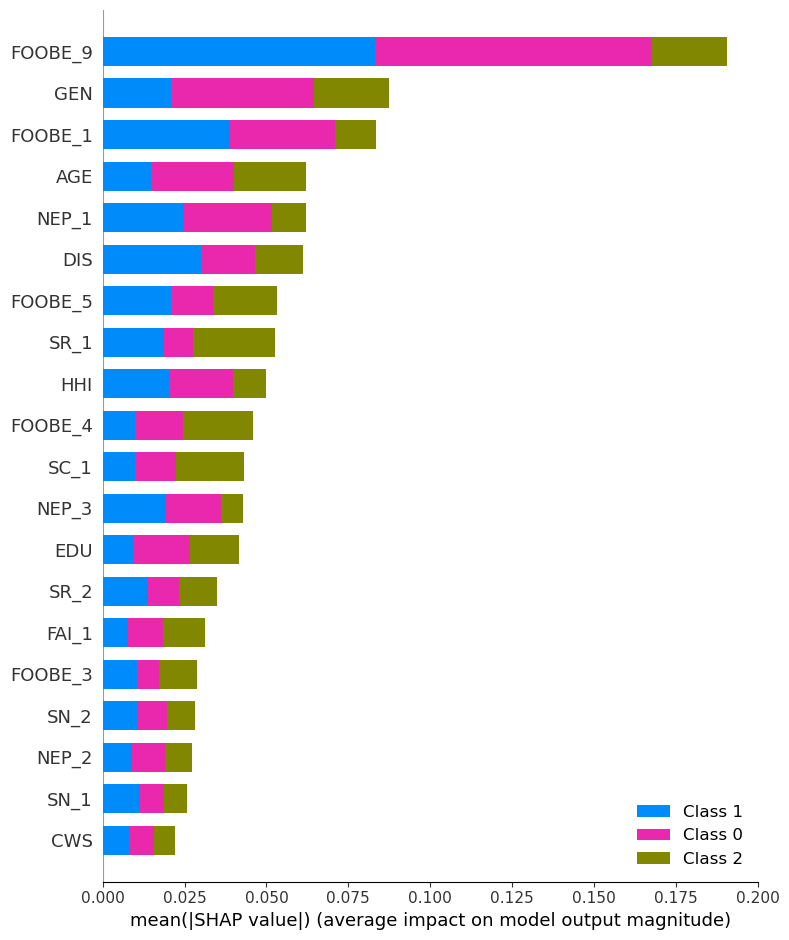

In [9]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

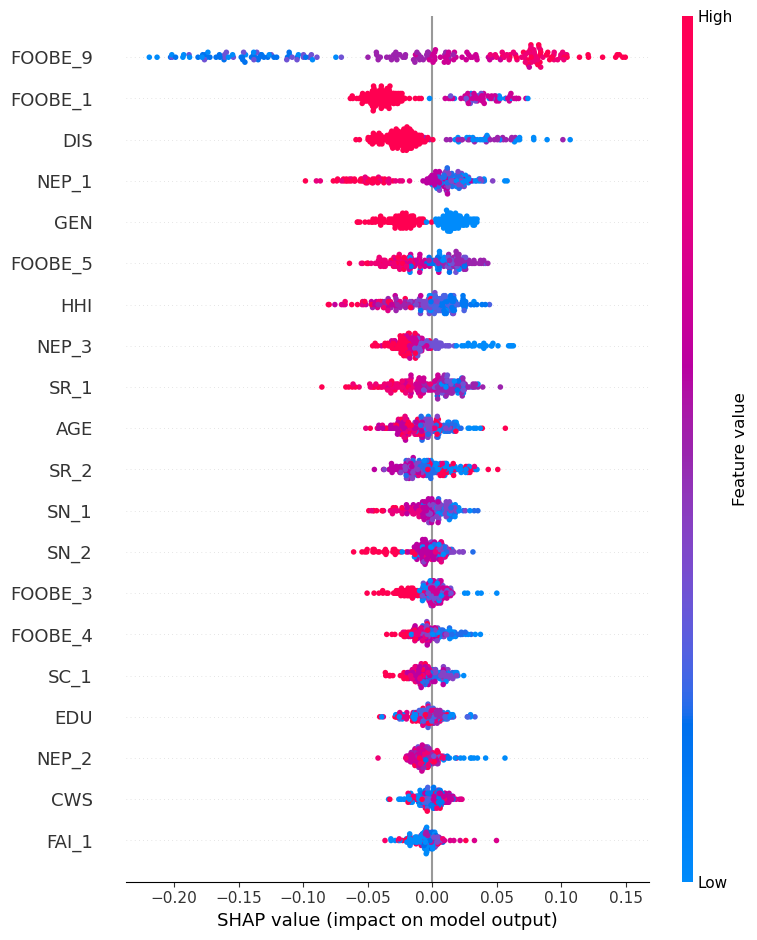

In [10]:
# For binary classification, you'd have shap_values[0] for class 0 and shap_values[1] for class 1.
# For multi-class classification, index corresponds to the class order.
class_index = 1  # Replace with the class of interest
shap.summary_plot(shap_values[class_index], X_test)

In [11]:
# Visualize the first prediction's explanation
shap.initjs()  # Initialize JavaScript in the notebook for SHAP plots
shap.force_plot(explainer.expected_value[class_index], shap_values[class_index][0,:], X_test.iloc[0,:])

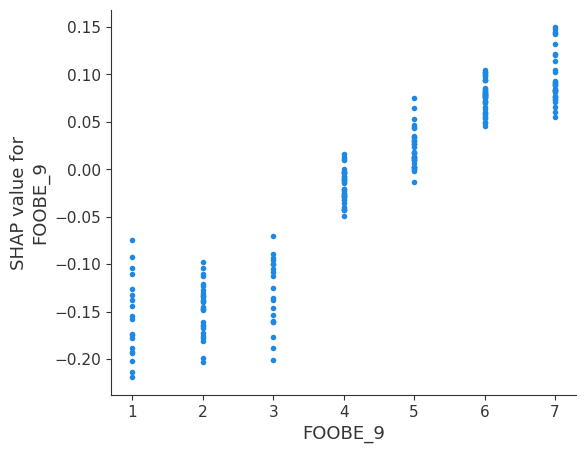

In [12]:
# Choose a feature for which you want to plot the SHAP values
feature = 'FOOBE_9'

# Plot the dependence plot for one feature
shap.dependence_plot(feature, shap_values[1], X_test, interaction_index=None)

ValueError: Could not find feature named: Feature_A

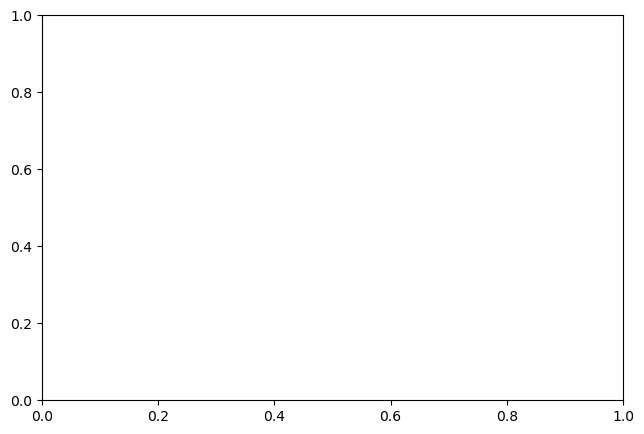

In [13]:
# Calculate interaction values - this can be computationally expensive
shap_interaction_values = explainer.shap_interaction_values(X_test)

# Choose a specific feature pair for which you want to plot the interaction values
shap.dependence_plot(
    ('Feature_A', 'Feature_B'),
    shap_interaction_values[1], # Assuming binary classification, use [1] for class 1
    X_test
)

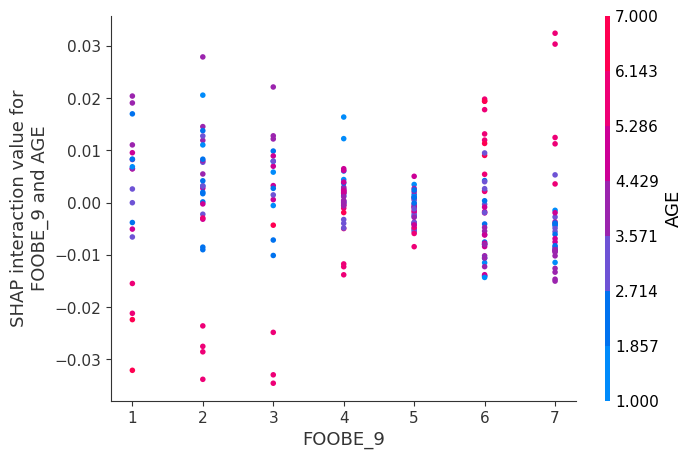

NameError: name 'plt' is not defined

In [14]:
import shap

# Create the SHAP explainer object for your Random Forest model
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP interaction values for the test set - this can be very memory and computation intensive
# It is recommended to do this on a smaller sample if you run into resource issues
shap_interaction_values = explainer.shap_interaction_values(X_test)

# Choose the class index for which you want to analyze interactions
# This should match one of your classes, for example 0, 1, or 2
class_index = 1  # Replace with the class of interest: 0 for Class 1, 1 for Class 2, and so on

# Choose specific features to visualize the interaction effect
# Replace 'Feature_A' and 'Feature_B' with actual feature names from your dataset
feature_a = 'FOOBE_9'
feature_b = 'AGE'

# Plot the dependence plot for the chosen features and class
shap.dependence_plot(
    (feature_a, feature_b),
    shap_interaction_values[class_index],  # Index for the class of interest
    X_test,
    interaction_index=feature_b  # Set the specific feature you want to see the interaction with
)

# If your notebook environment does not display plots automatically, add:
plt.show()

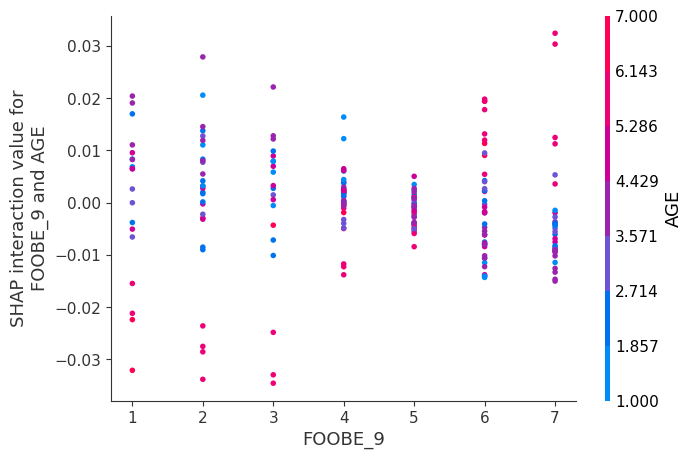

In [15]:
import matplotlib.pyplot as plt

# (Assuming you have already calculated SHAP interaction values and set the features)

# Plot the dependence plot for the chosen features and class
shap.dependence_plot(
    (feature_a, feature_b),
    shap_interaction_values[class_index],  # Index for the class of interest
    X_test,
    interaction_index=feature_b  # Set the specific feature you want to see the interaction with
)

# Display the plot
plt.show()